In [34]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re 

import warnings
warnings.filterwarnings('ignore')


from tensorflow.keras.layers import Conv1D,LSTM,Bidirectional,Dense,Input,Dropout,SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('Text-classification.csv',encoding='latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns=['sentiment','id','date','query','user_id','text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df=df.drop(['id','date','query','user_id'],axis=1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

In [6]:
label_sentiment={0:'Negative',4:'Positive'}
def label_mapping(label):
    return label_sentiment[label]

df.sentiment=df.sentiment.apply(lambda x : label_mapping(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


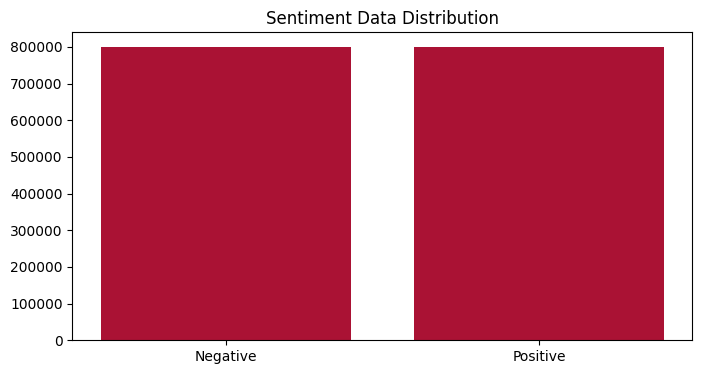

In [7]:
val_counts=df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_counts.index,val_counts.values,color='#AA1234')
plt.title("Sentiment Data Distribution")
plt.show()

In [8]:
df.sample(10)

,sentiment,text
1313298,Positive,@alexanimal come over and watch it with me and...
986486,Positive,http://twitpic.com/5ezs4 Tigger on his way to ...
856852,Positive,@isla_fisher well if you stay at the Sheraton ...
207491,Negative,So nice 2 not be workin today n tomorrow! Stil...
1529871,Positive,bubye tweeple gudnite
217563,Negative,back from Grad trip... last trip of the year.....
180306,Negative,@jasonbarton33 I just had &quot;5 Guys Burgers...
1110878,Positive,is super excited
679371,Negative,"Wants to talk to him,but hes not awake."
480240,Negative,@lisibo really missed you at the eTwinning c...


In [9]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [10]:
stop_words=stopwords.words('english')
stemmer=SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [11]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [12]:
df.text=df.text.apply(lambda x : preprocess(x))

In [13]:
df.head(10)

,sentiment,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset update facebook texting might cry result...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad see
5,Negative,whole crew
6,Negative,need hug
7,Negative,hey long time see yes rains bit bit lol fine t...
8,Negative,nope
9,Negative,que muera


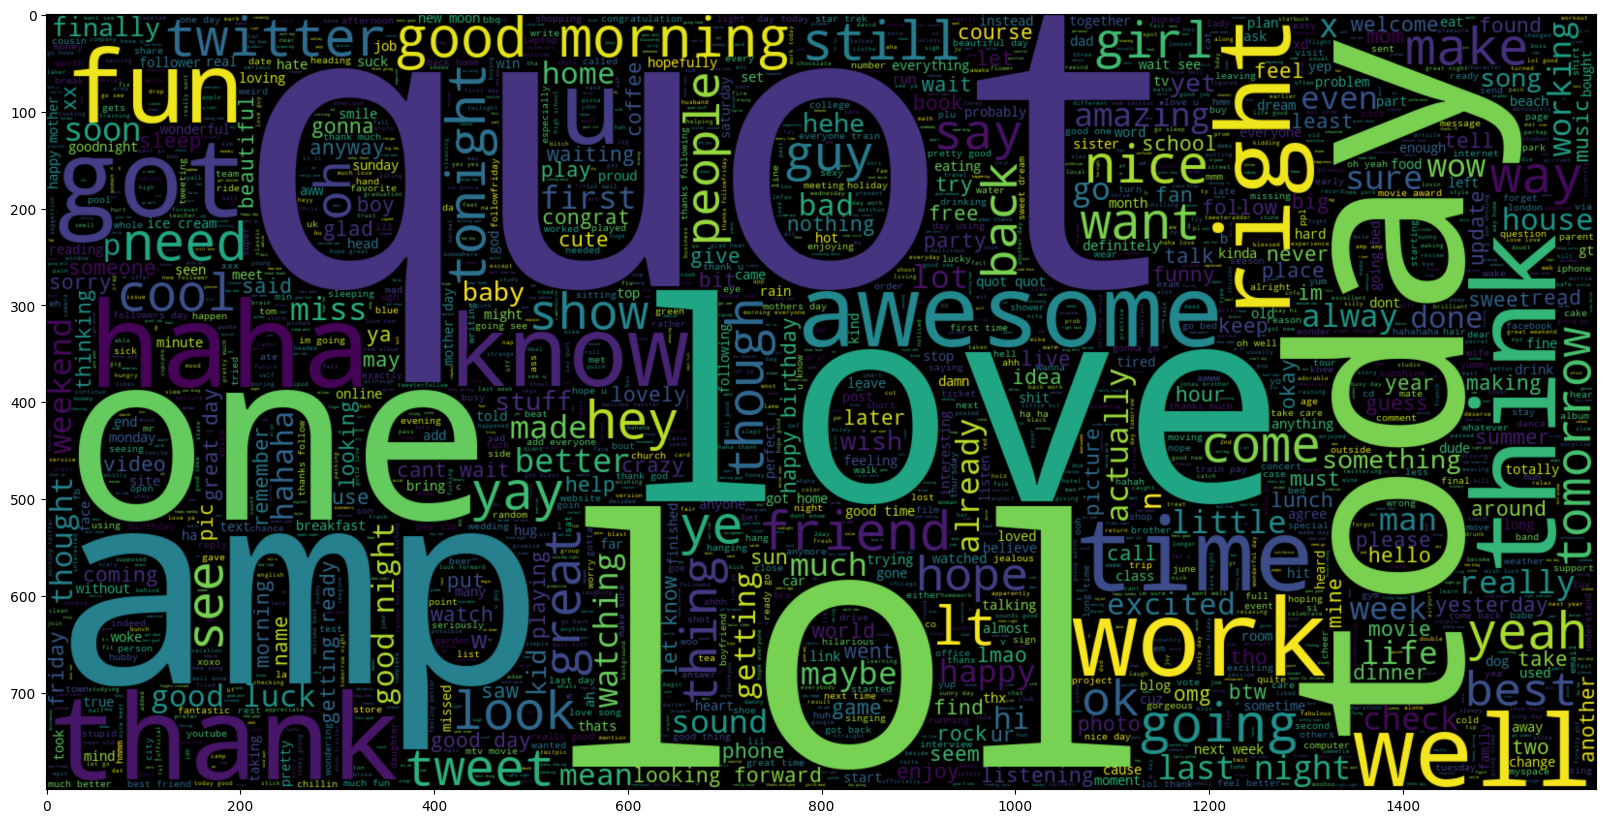

In [14]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(df[df.sentiment =='Positive'].text))
plt.imshow(wc,interpolation='gaussian')

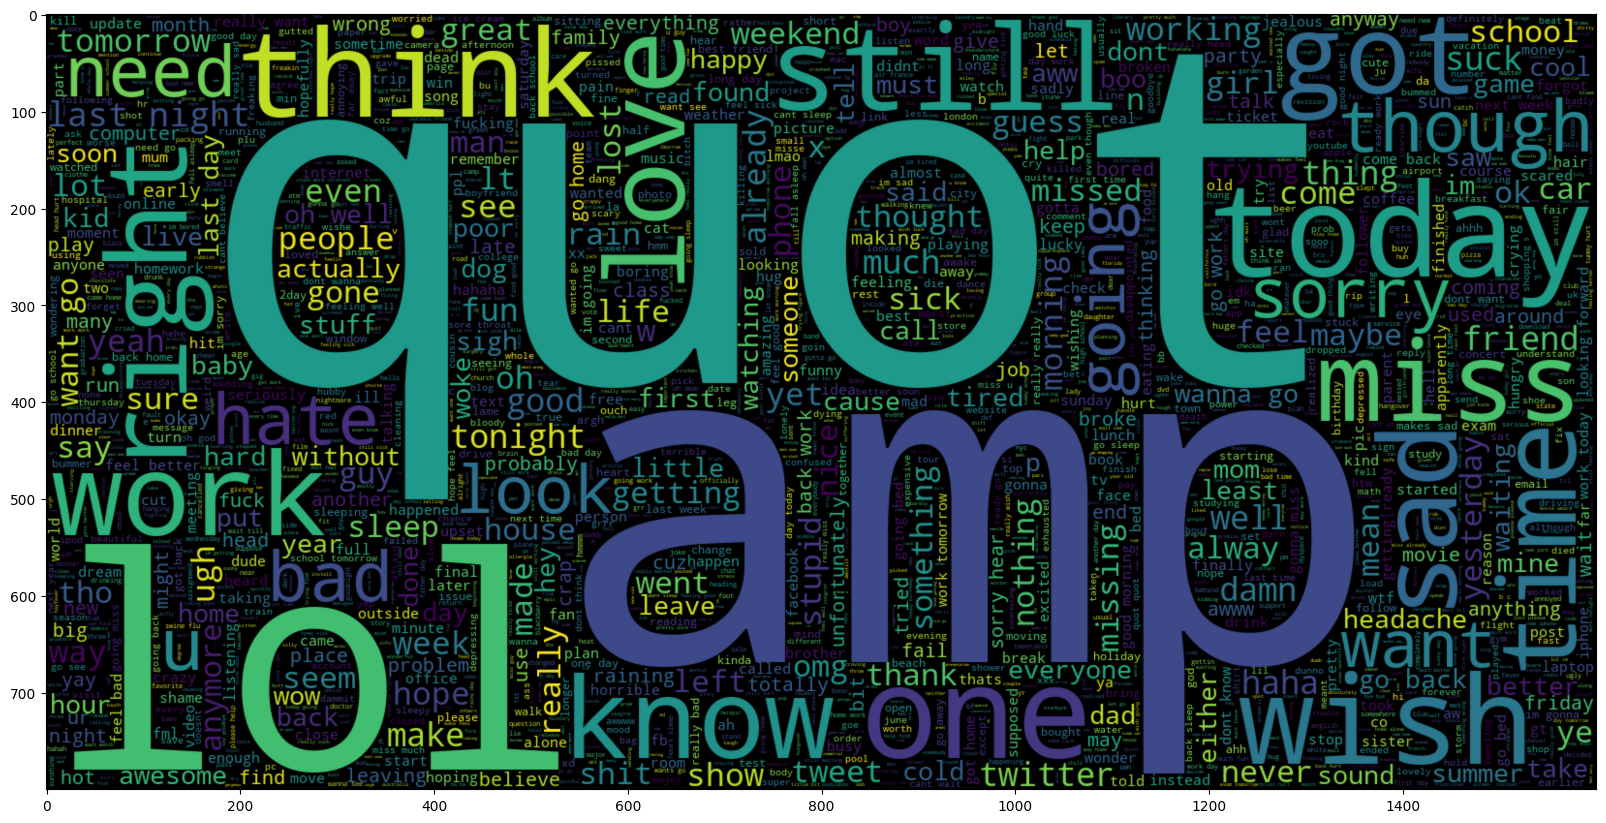

In [16]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(df[df.sentiment =='Negative'].text))
plt.imshow(wc,interpolation='gaussian')

In [17]:
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [18]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=7)

print("Train Data Size",train_data.shape)
print("Test Data Size ",test_data.shape)

Train Data Size (1280000, 2)
Test Data Size  (320000, 2)


In [19]:
train_data.head(10)

,sentiment,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data.text)
word_index=tokenizer.word_index
vocab_size=len(tokenizer.word_index) + 1
print('Vocabulary Size : ',vocab_size)

Vocabulary Size :  290575


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=tokenizer.texts_to_sequences(train_data.text)
test_seq=tokenizer.texts_to_sequences(test_data.text)
X_train=pad_sequences(train_seq,maxlen=MAX_SEQUENCE_LENGTH)
X_test=pad_sequences(test_seq,maxlen=MAX_SEQUENCE_LENGTH)

In [22]:
print("Training X Shape :",X_train.shape)
print("Testing X Shape :",X_test.shape)

Training X Shape : (1280000, 30)
Testing X Shape : (320000, 30)


In [23]:
labels=train_data.sentiment.unique().tolist()
labels

['Negative', 'Positive']

In [24]:
encoder=LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

LabelEncoder()

In [25]:
y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

In [26]:
print(y_train.shape)
print(y_test.shape)

(1280000,)
(320000,)


In [27]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [28]:
print(y_train.shape)
print(y_test.shape)

(1280000, 1)
(320000, 1)


In [29]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [30]:
GLOVE_EMB='glove_data/glove.6B.300d.txt'
EMBEDDING_DIM=300
LR=1e-3
BATCH_SIZE=1024
EPOCHS=10

In [31]:
embedding_index={}

with open(GLOVE_EMB, 'r', encoding='utf-8') as file:
    for line in file :
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:],dtype='float32')
        embedding_index[word]=coefs
file.close()

print(f"Found {len(embedding_index)} word vectors")

Found 400000 word vectors


In [32]:
embedding_matrix=np.zeros((vocab_size,EMBEDDING_DIM))
for word,i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [36]:
embedding_layer=tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [38]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [41]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 258s 191ms/step - loss: 0.5199 - accuracy: 0.7386 - val_loss: 0.4821 - val_accuracy: 0.7657 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 238s 190ms/step - loss: 0.4881 - accuracy: 0.7621 - val_loss: 0.4747 - val_accuracy: 0.7717 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 238s 191ms/step - loss: 0.4773 - accuracy: 0.7692 - val_loss: 0.4673 - val_accuracy: 0.7760 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 221s 177ms/step - loss: 0.4705 - accuracy: 0.7736 - val_loss: 0.4632 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 222s 178ms/step - loss: 0.4663 - accuracy: 0.7764 - val_loss: 0.4621 - val_accuracy: 0.7791 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 220s 176ms/step - loss: 0.4630 - accuracy: 0.7785 - val_loss: 0.4592 - val_accuracy: 0.7798 - lr: 0.0010
Epoch 7/10
1250/1250 [============

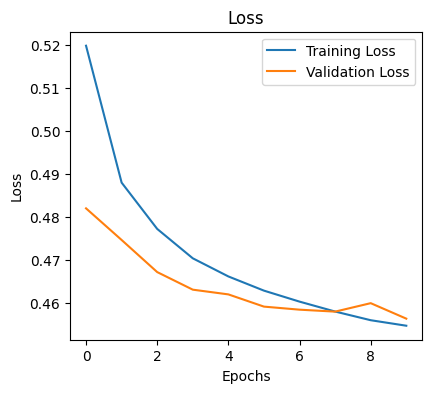

In [47]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

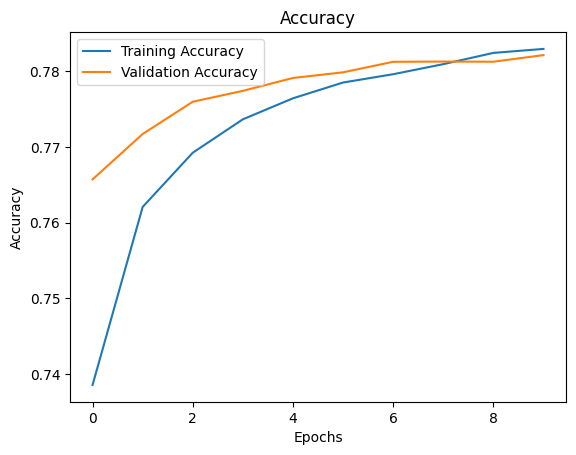

In [49]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()